In [2]:
import pandas as pd
import pymysql
import numpy as np
import os
import json
import matplotlib.pyplot as plt
from collections import Counter
from functools import reduce
from data_utils import *
from etl import user_info_features
from collections import defaultdict, OrderedDict
from IPython.core.pylabtools import figsize
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
pd.set_option('max_columns',1000)
pd.set_option('max_rows', 1000)

## Base User Info

In [3]:
conn = pymysql.connect(host = '127.0.0.1', 
                       user = 'root', 
                       password = 'root123', 
                       db = 'delidou')

base_user_info = pd.read_sql_query('select * from base_user_info', conn)
user_feature_df = user_info_features(base_user_info)

In [4]:
user_feature_df

,sex_男,sex_未知,sex_女,region_新山,region_白银,region_乌隆,region_长治,region_Komae,region_营口,region_浦项,region_威尼斯,region_四平,region_布尔根兰,region_枣庄,region_九江,region_Shanghai,region_吕梁,region_本溪,region_宁波,region_榆林,region_漳州,region_合肥,region_青岛,region_常德,region_湖北省,region_中卫,region_大理,region_铁岭,region_温哥华,region_包头,region_六盘水,region_通化,region_鸡西,region_银川,region_泽西,region_湛江,region_晋城,region_黄冈,region_迪庆,region_唐山,region_澳门,region_黔南,region_临沂,region_梧州,region_恩施,region_西双版纳,region_楚雄,region_Yongsan-gu,region_河源,region_安康,region_哈密,region_宝鸡,region_哥本哈根,region_焦作,region_珠海,region_茂名,region_大兴安岭,region_深圳,region_伊春,region_天水,region_随州,region_攀枝花,region_Beijing,region_琼海,region_孝感,region_滨州,region_邵阳,region_莆田,region_丹东,region_阜阳,region_张家口,region_怀化,region_金昌,region_Wuhan,region_文山,region_安阳,region_伦敦,region_宜宾,region_忻州,region_东京,region_San Diego,region_眉山,region_信阳,region_郴州,region_衡水,region_延边,region_海东,region_凉山,region_金华,region_常州,region_无锡,region_七台河,region_衢州,region_廊坊,region_江门,region_惠州,region_南隆达,region_鞍山,region_娄底,region_吉安,region_南通,region_陵水,region_呼和浩特,region_Berlin,region_天门,region_昆明,region_Chesterbrook,region_吐鲁番,region_清远,region_固原,region_北海,region_多伦多,region_济南,region_Kita-ku,region_南昌,region_강남구,region_伊犁,region_昌吉,region_三亚,region_黔西南,region_宜春,region_中山,region_丽水,region_蚌埠,region_萍乡,region_渭南,region_武汉,region_福州,region_荆州,region_南平,region_Kōtō-ku,region_嘉义,region_大阪,region_Edmonton,region_潮州,region_沈阳,region_列治文,region_三门峡,region_长春,region_许昌,region_铜陵,region_汤斯维尔,region_珀斯,region_保定,region_延安,region_蒂罗尔,region_自贡,region_十堰,region_河南省,region_甘南,region_淮北,region_奥克兰,region_舟山,region_Seongbuk-gu,region_丽江,region_凤凰城,region_佛山,region_天津,region_崇左,region_London,region_堪培拉,region_罗马,region_宜昌,region_Cherry Valley,region_首尔,region_周口,region_Chapel Hill,region_定西,region_汕尾,region_铜川,region_运城,region_淄博,region_新北,region_剑桥,region_兰州,region_温尼伯,region_新界,region_Harris County,region_襄阳,region_秦皇岛,region_旧金山,region_遂宁,region_南充,region_潜江,region_泸州,region_菏泽,region_德州,region_白山,region_巴黎,region_大理白族自治州,region_洛阳,region_拉萨,region_Los Angeles,region_咸阳,region_庆阳,region_海北,region_长沙,region_北京,region_牛顿,region_石家庄,region_酒泉,region_盐城,region_海南,region_Toshima Mura,region_法兰克福,region_Gangnam-gu,region_扬州,region_潍坊,region_承德,region_恩施土家族苗族自治州,region_慕尼黑县,region_辽源,region_奇诺,region_呼伦贝尔,region_内江,region_上饶,region_堺,region_绍兴,region_罗切斯特,region_杜塞尔多夫,region_Hangzhou,region_休斯敦,region_松原,region_滁州,region_阿伦敦,region_齐齐哈尔,region_三明,region_龙岩,region_宁德,region_提契诺,region_马德里,region_伍伦贡,region_西宁,region_大同,region_悉尼,region_哈尔滨,region_五指山,region_临沧,region_濮阳,region_保山,region_圣迭戈,region_成都,region_桂林,region_上奥地利,region_黄山,region_巴中,region_大庆,region_曲靖,region_黄石,region_来宾,region_三沙,region_台州,region_揭阳,region_葫芦岛,region_McKinney,region_温州,region_烟台,region_池州,region_广元,region_Orlando City,region_绥化,region_广安,region_马鞍山,region_奥本,region_嘉兴,region_埃弗里特,region_锦州,region_广州,region_达州,region_怒江傈僳族自治州,region_亳州,region_下奥地利,region_遵义,region_鹰潭,region_达尔文,region_海口,region_纽约,region_抚顺,region_Brasovskiy Rayon,region_肇庆,region_Harbin,region_德阳,region_南阳,region_巴塞罗那,region_杭州,region_马六甲,region_德宏,region_湘潭,region_Irvine,region_Missing,region_Houston City,region_赣州,region_咸宁,region_洛杉矶,region_宿迁,region_双鸭山,region_曼彻斯特,region_永州,region_威海,region_沧州,region_黑河,region_阳江,region_玉林,region_新余,region_堡垒山,region_重庆,region_河池,region_贺州,region_世田谷区,region_阜新,region_苏州,region_难,region_金边,region_太原,region_玉树藏族自治州,region_盘锦,region_安庆,region_徐州,region_开封,region_吉林,region_东营,region_东莞,region_鄂州,region_商丘,region_邯郸,region_安城,region_抚州,region_晋中,region_连云港,region_贵港,region_平顶山,region_日野,region_台北,region_文昌,region_韶关,region_武威,region_益阳,region_Chengdu,region_大连,region_洛杉矶县,region_墨尔本,region_辽阳,region_巴音郭楞,region_惠灵顿,region_朝阳,region_玉溪,region_石河子,region_六安,region_淮安,region_梅州,region_湖州,region_陇南,region_萨尔茨堡,region_驻马店,region_汕头,region_钦州,region_南京,region_赤峰,region_汉中,region_Berkeley City,region_鹤岗,region_新乡,region_利隆圭,region_聊城,region_Ryde,region_Yssingeaux,region_衡阳,region_张家界,r

## Base User Fans

In [5]:
base_user_fans = pd.read_sql_query('select * from base_user_fans', conn)
fans_active_week_rate, _ = vectorize_json_fixed_length(base_user_fans, 'fans_active_week_rate')
male_age_rate, male_ar_names = vectorize_json_fixed_length(base_user_fans, 'male_age_rate')
female_age_rate, female_ar_names = vectorize_json_fixed_length(base_user_fans, 'female_age_rate')
fans_active_day_rate, fans_day_names = vectorize_json_fixed_length(base_user_fans, 'fans_active_day_rate')
word_cloud,word2index = vectorize_json_variable_length(base_user_fans, 'comment_cloud')
city_rate,city_rate_name = vectorize_json_variable_length(base_user_fans, 'city_rate')
base_user_fans_small = base_user_fans[['id','create_time','male_rate','female_rate']]
city_rate_level, city_rate_level_name = vectorize_json_variable_length(base_user_fans,'city_level_rate')

## Live reviewers

In [4]:
live_review = pd.read_sql_query('select * from base_live_viewer', conn)
l_male_age_rate = vectorize_json_fixed_length(live_review, 'male_age_rate')
l_female_age_rate = vectorize_json_fixed_length(live_review, 'female_age_rate')
l_wordcloud,_ = vectorize_json_variable_length(live_review, col = 'comment_cloud')
l_cityrate,_ = vectorize_json_variable_length(live_review, col = 'city_rate')
l_view_source , names= vectorize_json_variable_length(live_review,'viewer_source')
l_view_source = pd.DataFrame(l_view_source,columns = names.keys())

In [5]:
# with open('resource/hit_stopwords.txt','r') as f:
#     stopwords = []
#     for line in f:
#         stopwords.append(line.strip())
        
# filter_word2index = {k:v for k,v in word2index.items() if k not in stopwords}
# valid_indices = np.array(list(filter_word2index.values()))
# word_freq = word_cloud.sum(axis = 0)
# freqs = word_freq[np.array(list(filter_word2index.values()))]
# words = np.array(list(filter_word2index.keys()))

### Sex and Age

In [9]:
def label_sex(male_age_rate, female_age_rate, male_ar_names, female_ar_names):

    # combine sex and age
    sex_age = np.c_[male_age_rate, female_age_rate]

    # rename columns 
    male_ar_names = ['male_' + name for name in male_ar_names]
    female_ar_names = ['female_' + name for name in female_ar_names]

    # make a dataframe
    sex_age = pd.DataFrame(sex_age, columns = male_ar_names + female_ar_names)
    
    # kmeans clustering
    kmeans_sexage = KMeans(n_clusters = 6,random_state = 42)
    labels = kmeans_sexage.fit_predict(sex_age)
    
    # assign labels
    sex_age['id'] = base_user_fans['id'].copy()
    sex_age['label'] = labels
    
    return sex_age[['id','label']]

In [10]:
sex_age = label_sex(male_age_rate, female_age_rate, male_ar_names, female_ar_names)

In [11]:
sex_age

,id,label
0,100007005019,5
1,100007888531,2
2,100009521785,4
3,100011394784,2
4,100012587574,5
...,...,...
14417,52672437511,0
14418,52678129907,0
14419,52682998490,0
14420,52686308141,1


In [46]:
def clustering_inertials(vectors):
    inertials = []
    for i in range(2,20):
        kmeans = KMeans(n_clusters = i)
        kmeans.fit(StandardScaler().fit_transform(vectors))
        inertials.append(kmeans.inertia_)
    figsize(8,6)
    plt.title('N_clusters')
    plt.plot(inertials, marker = '.', markersize = 20,linewidth = 3)
    plt.grid(linestyle = '--')
    plt.show()

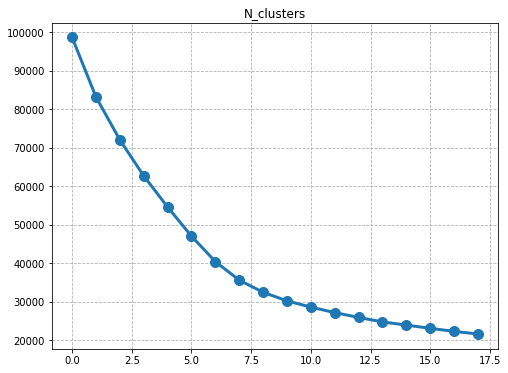

In [157]:
clustering_inertials(sex_age)

In [163]:
kmeans_sexage = KMeans(n_clusters = 6,random_state = 42)
labels = kmeans_sexage.fit_predict(sex_age)

In [164]:
sex_age['id'] = base_user_fans['id'].copy()
sex_age['label'] = labels

In [165]:
column_names = [col for col in sex_age.columns if col not in ['label','id']]

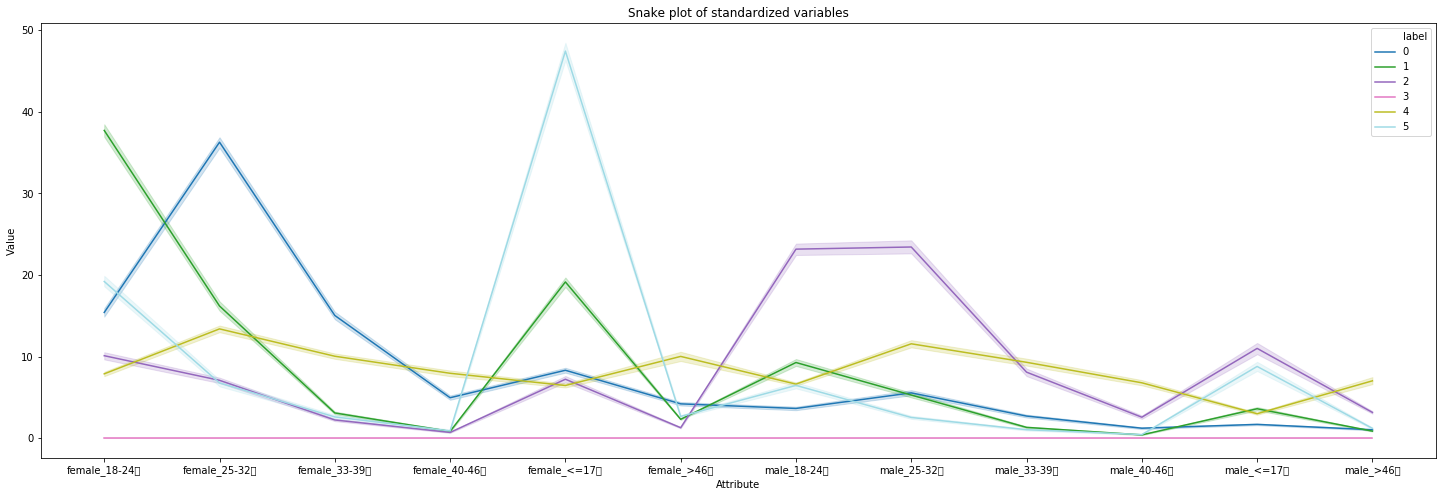

In [166]:
figsize(25,8)
snake_melt = pd.melt(sex_age.reset_index(), 
                    id_vars=['id','label'],
                    value_vars=column_names, 
                    var_name='Attribute', 
                    value_name='Value')

plt.title('Snake plot of standardized variables')
sns.lineplot(x="Attribute", y="Value", hue='label', data=snake_melt,legend = 'full',ci = 99,palette='tab20')
plt.show()

0: 25-32 女性多 - 青年女                
1: 17岁一下女，18-24女  - 少年女              
2: 17以下男，18-24男，25-32男 - 中青年男人              
3: 丢失数据              
4: 平均型                
5: 少年青年女，少年男                    

In [167]:
# sex_age.merge(base_user_info, on = 'id', how = 'left').head(1000)

In [213]:
day_rate_df = pd.DataFrame(fans_active_day_rate, columns  =fans_day_names)

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


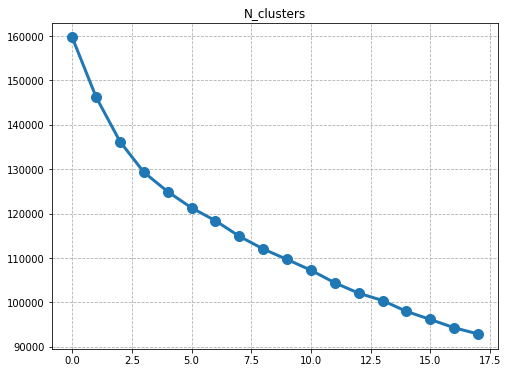

In [214]:
clustering_inertials(day_rate_df)

In [215]:
kmeans_sexage = KMeans(n_clusters = 8,random_state = 42)
time_labels = kmeans_sexage.fit_predict(day_rate_df)

In [216]:
day_rate_df['id'] = base_user_fans['id'].copy()
day_rate_df['label'] = time_labels

In [217]:
column_names = [col for col in day_rate_df.columns if col not in ['label','id']]

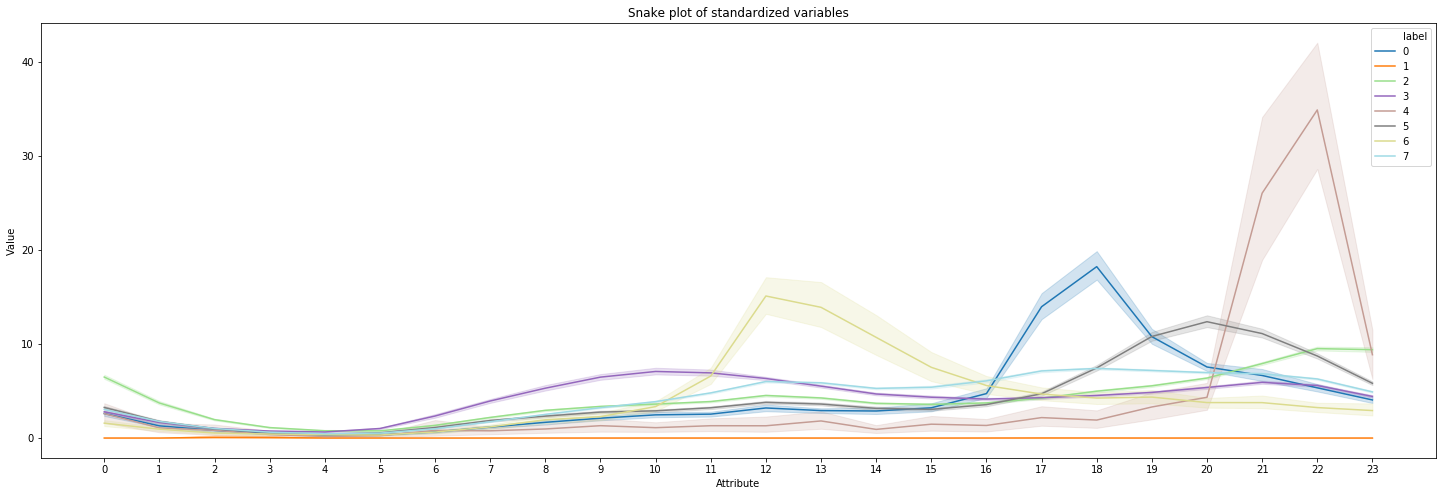

In [218]:
column_names = [col for col in day_rate_df.columns if col not in ['label','id']]

figsize(25,8)
snake_melt = pd.melt(day_rate_df.reset_index(), 
                    id_vars=['id','label'],
                    value_vars=column_names, 
                    var_name='Attribute', 
                    value_name='Value')

plt.title('Snake plot of standardized variables')
sns.lineplot(x="Attribute", y="Value", hue='label', data=snake_melt,legend = 'full',ci = 99,palette='tab20',sort = False)
plt.show()

In [219]:
lookup = day_rate_df.merge(base_user_info, on = 'id', how = 'left')

In [220]:
import matplotlib
matplotlib.rcParams['font.family'] = 'SimHei'

In [221]:
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

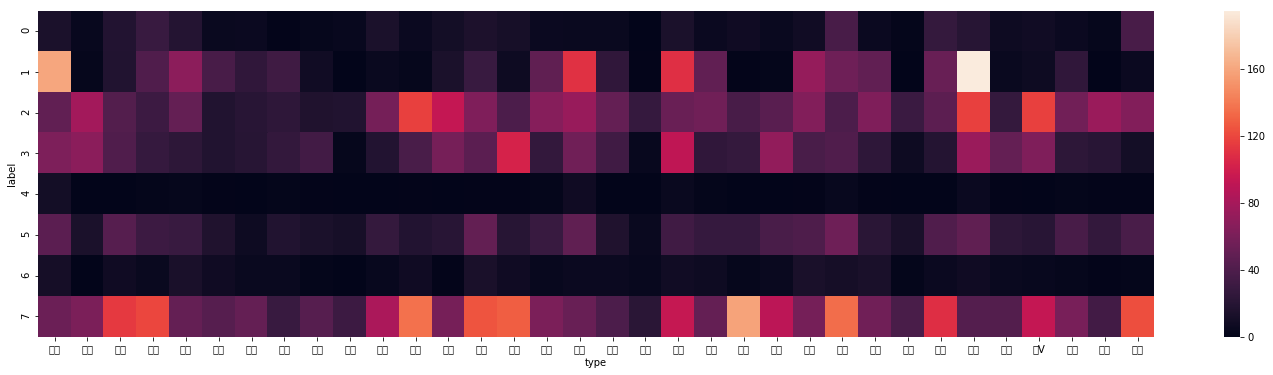

In [222]:
distribution = {}
for l in np.unique(lookup.label):
    sub = lookup[lookup.label == l]
    distribution[l] = sub.tag.value_counts().to_dict()
    
result = []
for l,d in distribution.items():
    for k,v in d.items():
        result.append([l,k,v])
result = pd.DataFrame(result, columns = ['label','type','count'])    
figsize(25,6)
sns.heatmap(result.pivot(index = 'label', columns = 'type', values = 'count').fillna(0))

In [223]:
result_p = result.pivot(index = 'label', columns = 'type', values = 'count')

In [224]:
result_p

type,健康,其他,剧情,动漫,品味,奇趣,宠物,家居,少儿,帅哥,幽默,影视,情感,搭配,政务,教学,教育,旅行,明星,母婴,汽车,游戏,生活,知识,种草,科技,美女,美妆,职场,舞蹈,蓝V,运动,音乐,食品
label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,14.0,4.0,18.0,29.0,19.0,5.0,6.0,1.0,3.0,4.0,14.0,6.0,10.0,15.0,12.0,6.0,5.0,5.0,NaN,14.0,6.0,8.0,5.0,9.0,37.0,6.0,2.0,27.0,20.0,7.0,9.0,6.0,3.0,37.0
1,160.0,3.0,17.0,41.0,69.0,37.0,25.0,32.0,9.0,NaN,5.0,3.0,14.0,29.0,7.0,48.0,111.0,25.0,1.0,110.0,49.0,1.0,2.0,73.0,55.0,49.0,NaN,52.0,195.0,5.0,7.0,25.0,NaN,6.0
2,49.0,79.0,42.0,31.0,51.0,17.0,21.0,24.0,16.0,17.0,58.0,118.0,94.0,63.0,39.0,66.0,74.0,51.0,28.0,53.0,56.0,37.0,45.0,64.0,39.0,63.0,30.0,47.0,118.0,27.0,118.0,57.0,75.0,64.0
3,62.0,68.0,41.0,28.0,23.0,17.0,20.0,26.0,34.0,3.0,18.0,38.0,59.0,46.0,103.0,26.0,56.0,33.0,4.0,92.0,25.0,27.0,71.0,38.0,41.0,24.0,7.0,19.0,75.0,51.0,63.0,23.0,21.0,10.0
4,10.0,NaN,NaN,2.0,3.0,1.0,NaN,2.0,1.0,NaN,NaN,1.0,NaN,1.0,1.0,2.0,8.0,NaN,NaN,5.0,2.0,NaN,NaN,1.0,4.0,1.0,NaN,NaN,6.0,1.0,NaN,2.0,1.0,1.0
5,46.0,14.0,44.0,31.0,29.0,16.0,7.0,17.0,14.0,12.0,27.0,18.0,21.0,50.0,20.0,29.0,48.0,16.0,5.0,33.0,28.0,28.0,38.0,40.0,55.0,22.0,13.0,41.0,48.0,23.0,21.0,37.0,26.0,38.0
6,11.0,NaN,8.0,5.0,13.0,8.0,5.0,5.0,2.0,NaN,4.0,8.0,1.0,13.0,8.0,4.0,6.0,6.0,4.0,9.0,7.0,3.0,5.0,13.0,11.0,13.0,2.0,6.0,8.0,5.0,4.0,3.0,1.0,2.0
7,54.0,61.0,115.0,120.0,51.0,44.0,51.0,29.0,44.0,31.0,83.0,137.0,59.0,125.0,129.0,61.0,52.0,39.0,22.0,95.0,51.0,159.0,90.0,58.0,135.0,56.0,38.0,109.0,43.0,42.0,94.0,60.0,34.0,123.0


In [233]:
pd.DataFrame(city_rate, columns = city_rate_name).sum(axis = 1)

0       35.14
1        0.00
2       36.49
3        0.00
4       30.09
        ...  
8464    30.57
8465    29.92
8466    32.28
8467    37.50
8468    34.61
Length: 8469, dtype: float64

In [234]:
base_user_fans

,id,create_time,male_rate,female_rate,male_age_rate,female_age_rate,city_rate,comment_cloud,fans_active_day_rate,fans_active_week_rate
0,100007005019,2020-06-24 10:32:11,61.96,38.04,"[{""name"": ""<=17岁"", ""value"": 2.07}, {""name"": ""1...","[{""name"": ""<=17岁"", ""value"": 3.16}, {""name"": ""1...","[{""name"": ""武汉"", ""value"": 4.57}, {""name"": ""西安"",...","[{""name"": ""卓哥"", ""value"": 325}, {""name"": ""喜欢"", ...","[{""name"": ""0"", ""value"": 5.36}, {""name"": ""1"", ""...","[{""name"": ""周一"", ""value"": 18.41}, {""name"": ""周二""..."
1,100007888531,2020-06-24 10:32:11,0.00,0.00,{},{},{},{},{},{}
2,100009521785,2020-06-24 10:32:11,14.77,85.23,"[{""name"": ""<=17岁"", ""value"": 1.45}, {""name"": ""1...","[{""name"": ""<=17岁"", ""value"": 7.64}, {""name"": ""1...","[{""name"": ""上海"", ""value"": 8.77}, {""name"": ""赣州"",...","[{""name"": ""婆婆"", ""value"": 1626}, {""name"": ""我们"",...","[{""name"": ""0"", ""value"": 2.42}, {""name"": ""1"", ""...","[{""name"": ""周一"", ""value"": 12.11}, {""name"": ""周二""..."
3,100011394784,2020-06-24 10:32:11,0.00,0.00,{},{},{},{},{},{}
4,100012587574,2020-06-24 10:32:11,69.85,30.15,"[{""name"": ""<=17岁"", ""value"": 4.22}, {""name"": ""1...","[{""name"": ""<=17岁"", ""value"": 5.4}, {""name"": ""18...","[{""name"": ""郑州"", ""value"": 5.04}, {""name"": ""东莞"",...","[{""name"": ""判刑"", ""value"": 437}, {""name"": ""一个"", ...","[{""name"": ""0"", ""value"": 4.52}, {""name"": ""1"", ""...","[{""name"": ""周一"", ""value"": 17.56}, {""name"": ""周二""..."
...,...,...,...,...,...,...,...,...,...,...
8464,111347045870,2020-06-24 11:12:09,37.06,62.94,"[{""name"": ""<=17岁"", ""value"": 1.65}, {""name"": ""1...","[{""name"": ""<=17岁"", ""value"": 6.92}, {""name"": ""1...","[{""name"": ""武汉"", ""value"": 5.04}, {""name"": ""西安"",...","[{""name"": ""好吃"", ""value"": 327}, {""name"": ""这个"", ...","[{""name"": ""0"", ""value"": 3.23}, {""name"": ""1"", ""...","[{""name"": ""周一"", ""value"": 12.54}, {""name"": ""周二""..."
8465,111347779499,2020-06-24 11:12:10,69.37,30.63,"[{""name"": ""<=17岁"", ""value"": 3.56}, {""name"": ""1...","[{""name"": ""<=17岁"", ""value"": 4.1}, {""name"": ""18...","[{""name"": ""济南"", ""value"": 4.87}, {""name"": ""西安"",...","[{""name"": ""怎么"", ""value"": 251}, {""name"": ""可以"", ...","[{""name"": ""0"", ""value"": 10.5}, {""name"": ""1"", ""...","[{""name"": ""周一"", ""value"": 14.58}, {""name"": ""周二""..."
8466,111347930342,2020-06-24 11:12:10,63.96,36.04,"[{""name"": ""<=17岁"", ""value"": 0}, {""name"": ""18-2...","[{""name"": ""<=17岁"", ""value"": 0.68}, {""name"": ""1...","[{""name"": ""苏州"", ""value"": 12.39}, {""name"": ""平顶山...","[{""name"": ""小妹"", ""value"": 97}, {""name"": ""教练"", ""...","[{""name"": ""0"", ""value"": 1.43}, {""name"": ""1"", ""...","[{""name"": ""周一"", ""value"": 17.53}, {""name"": ""周二""..."
8467,111354474274,2020-06-24 11:12:10,88.86,11.14,"[{""name"": ""<=17岁"", ""value"": 15.25}, {""name"": ""...","[{""name"": ""<=17岁"", ""value"": 4.87}, {""name"": ""1...","[{""name"": ""长沙"", ""value"": 5.78}, {""name"": ""南京"",...","[{""name"": ""哥哥"", ""value"": 2409}, {""name"": ""嘿市"",...","[{""name"": ""0"", ""value"": 4.17}, {""name"": ""1"", ""...","[{""name"": ""周一"", ""value"": 6.41}, {""name"": ""周二"",..."


In [235]:
tencent_path = '/Users/huan/Desktop/weibo/word_vector/Tencent_AILab_ChineseEmbedding.txt'

In [238]:
embeddings_index = dict()
with open(tencent_path,'r') as f:
    next(f)
    for line in f:
        values = line.split(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()

In [242]:
from scipy.spatial.distance import cosine

In [252]:
# sample = embeddings_index['美女']
# sim = {}
# for k,v in embeddings_index.items():
#     sim[k] = cosine(sample,v)

In [257]:
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
vectorizer = TfidfTransformer()
vectorizer.fit(word_cloud)
word_cloud_transformed = vectorizer.transform(word_cloud)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [306]:
selector = np.array(word_cloud_transformed.sum(axis= 0))[0]
selected_columns = np.where(selector > 10)[0]
selected_rows = np.where(wc_reduced.sum(axis = 1) != 0)[0]

In [311]:
wc_reduced = word_cloud_transformed.toarray()[selected_rows,:][:, selected_columns]

In [312]:
from scipy.cluster.hierarchy import linkage, fcluster

In [323]:
sim_mat = linkage(wc_reduced, method = 'complete',metric = 'euclidean',optimal_ordering = False)

In [328]:
labels = fcluster(sim_mat, 15, 'maxclust')

In [329]:
from collections import Counter
Counter(labels)

Counter({5: 4635,
         4: 40,
         7: 122,
         6: 373,
         11: 1030,
         8: 548,
         10: 84,
         13: 67,
         9: 183,
         2: 39,
         3: 42,
         15: 9,
         1: 9,
         14: 11,
         12: 18})

In [338]:
t = base_user_fans.iloc[selected_rows,:].copy()

In [339]:
t['label'] = labels

In [348]:
s = t.comment_cloud[0]

In [363]:
def cloud_words(s):
    res = []
    try:
        for l in json.loads(s):
            res.append(l['name'])
        return ' '.join(res)
    except:
        return ''
    

In [364]:
t['clouds'] = t['comment_cloud'].apply(cloud_words)

In [375]:
t = t.merge(base_user_info,on='id',how = 'left')

In [18]:
lengths = [len(l) for l in city_rate_level]

In [19]:
base_user_fans['lengths'] = lengths

In [38]:
city_rate_level = city_rate_level / city_rate_level.sum(axis = 1).reshape(-1,1)

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [41]:
city_rate_level_df = pd.DataFrame(city_rate_level, columns  = city_rate_level_name)

In [44]:
city_rate_level_df = city_rate_level_df.fillna(0)

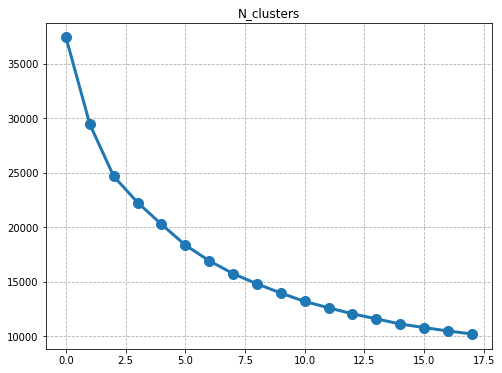

In [47]:
clustering_inertials(city_rate_level_df)

In [48]:
kmeans_sexage = KMeans(n_clusters = 7,random_state = 42)
city_rate_labels = kmeans_sexage.fit_predict(city_rate_level_df)

In [49]:
city_rate_level_df['id'] = base_user_fans['id'].copy()
city_rate_level_df['label'] = city_rate_labels

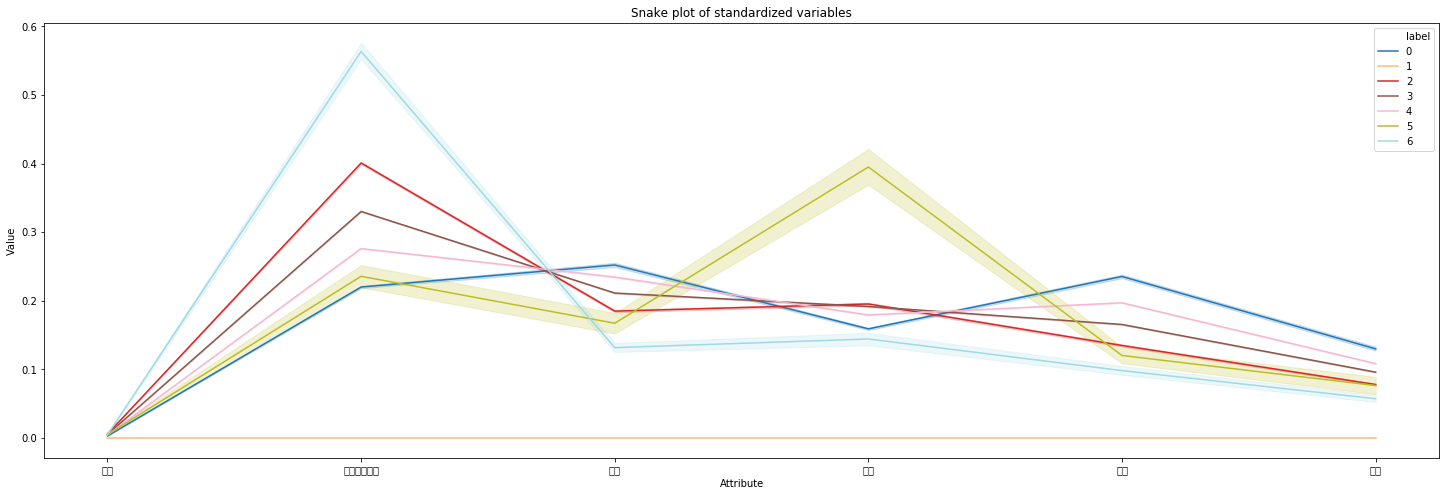

In [50]:
column_names = [col for col in city_rate_level_df.columns if col not in ['label','id']]

figsize(25,8)
snake_melt = pd.melt(city_rate_level_df.reset_index(), 
                    id_vars=['id','label'],
                    value_vars=column_names, 
                    var_name='Attribute', 
                    value_name='Value')

plt.title('Snake plot of standardized variables')
sns.lineplot(x="Attribute", y="Value", hue='label', data=snake_melt,legend = 'full',ci = 99,palette='tab20',sort = False)
plt.show()

In [52]:
city_rate_level_name

{'其他': 0, '超一线与一线': 1, '三线': 2, '二线': 3, '四线': 4, '五线': 5}

In [57]:
c = city_rate_level_df.merge(base_user_info, on = 'id', how = 'left')

In [59]:
c[c.label == 5]

,其他,超一线与一线,三线,二线,四线,五线,id,label,create_time,name,douyin_id,sex,region,tag,introduction,fans,videos,index_number,cert,likes
38,0.006686,0.243221,0.214246,0.320115,0.136423,0.079309,100058451884,5,2020-06-24 10:32:12,海南特区报,hntqb,女,海口,政务,新鲜事、有趣事，看我们！,405000.0,792.0,876.6,海南特区报官方账号,7504000.0
58,0.002072,0.097548,0.050242,0.808529,0.023653,0.017956,100072862011,5,2020-06-24 10:32:12,跟我一起吃遍无锡,chibianwuxi,女,无锡市,食品,锡城本地 美食探店指南\n发掘无锡 道地美食情报\n出镜粉丝招募中……私我\n———————...,1116000.0,383.0,912.3,优质美食自媒体,9265000.0
119,0.003736,0.179734,0.121323,0.353823,0.200110,0.141274,100141788924,5,2020-06-24 10:32:12,黑龙江日报,hljrb,男,哈尔滨,政务,传播龙江声音,839000.0,1192.0,907.8,黑龙江日报官方抖音账号,15554000.0
422,0.000000,0.333333,0.266667,0.333333,0.000000,0.066667,100517200739,5,2020-06-24 10:32:12,炫文💓化妆,jiabaili666,女,大连,美妆,一枚从事化妆专业8年用心服务顾客的小妆娘 \n真诚实在的新主播上线三天 期待朋友们多多支...,137000.0,413.0,806.3,\r\n,3238000.0
513,0.005186,0.220729,0.173676,0.333043,0.122043,0.145323,100644750645,5,2020-06-24 10:32:12,吉视守望都市,shouwangdushi,女,长春,政务,吉视都市频道《守望都市》栏目抖音号\n西瓜视频全网独播,1858000.0,3119.0,947.4,吉林电视台都市频道《守望都市》官方抖音号,34448000.0
781,0.000000,0.168675,0.228916,0.325301,0.108434,0.168675,100929398252,5,2020-06-24 10:32:12,玩点新科技,1102930720,男,安庆,科技,V❤️🔍玩机博士👈获取更多手机技巧\n合作👉17372755407 注明来意,1592000.0,41.0,910.8,None,6463000.0
838,0.000000,0.233333,0.200000,0.383333,0.166667,0.016667,101040581547,5,2020-06-24 10:32:12,奔跑的🐌,1107246911,未知,Missing,少儿,就想骗你们生女儿,50000.0,70.0,725.0,None,764000.0
874,0.003274,0.162202,0.104762,0.624405,0.069940,0.035417,101114099253,5,2020-06-24 10:32:12,贪食密探in温州,wdj0701,女,温州,蓝V,认真拍好每一个视频，不让喜欢我的人失望,967000.0,356.0,878.8,温州贪食密探网络科技有限公司,10125000.0
906,0.002817,0.239437,0.166197,0.402817,0.092958,0.095775,101148956205,5,2020-06-24 10:32:12,时尚穿搭社,1114611492,女,厦门,搭配,想要看什么风格的搭配，都可以留言告诉我哟～啾咪,563000.0,579.0,819.8,None,2731000.0
915,0.000000,0.263158,0.157895,0.315789,0.105263,0.157895,101153050520,5,2020-06-24 10:32:12,96的男生爱美食,knightsofsun,男,Missing,奇趣,95裸辞男生爱美食\n每日分享\n谢谢关注\n合作薇17501691013,54000.0,15.0,639.1,None,122000.0
